# Datos del paper de Fair sobre relaciones extramaritales

Fair, Ray. 1978. "A Theory of Extramarital Affairs," Journal of Political Economy, Febrero, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

Estos datos provienen de la revista Redbook, quien realizó una encuesta de mujeres en 1974 en la que se preguntó sobre relaciones extramatrimoniales. Este ejercicio no neecesariamente corresponde con el trabajo mostrado en el Paper de Fair, la idea de la tarea es que lleven a cabo un procedimiento alterno de los datos

## 1. Importación de bibliotecas y datos

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
from statsmodels.iolib.summary2 import summary_col

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Información de los datos:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [3]:
# Deescripción de los datos
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [4]:
# Importamos los datos a un data frame:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## 2. Transformación de los datos

In [5]:
# Agregamos una variable dicótomica para identificar personas con relaciones extramaritales
df['affair'] = (df['affairs'] > 0).astype(float)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1.0


In [6]:
# Estadísticas descriptivas de los datos:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


## 3. Estimamos el modelo

En esta sección deberá estimar el modelo Logit bivariado, para ello utilice como variable dependiente si el individuo tiene una relación extramarital, lo cual se considera en la variable: "affair", en la que se indica con un 1 si tiene y con 0 si no tiene.

Utilice como variables explicativas cualquiera de las demás variables (con excepción de "affairs", por ser en escencia la misma que la variable dependiente). 

La sintaxis de la instrucción del modelo Logit es:

modelo = logit("Var_dependiente ~ Var_independeinte_1 + Var_independeinte_2 + ...
                + Var_independeinte_K", Nombre_DataFrame)

In [7]:
# Definición del modelo
affair_mod = logit(" ~ ", df)

### Escriba una breve de cómo explican las variables elegidas a la variable dependiente:

Algunas preguntas guía:


¿qué efecto tendría la variable?


¿Considera que debería incluir alguna tranformación adicional de las variables?






In [8]:
# Estimación
affair_est = affair_mod.fit()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


In [9]:
# Imprimimos los resultados
print(affair_est.summary())

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Sat, 23 May 2020   Pseudo R-squ.:                  0.1327
Time:                        20:27:21   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation          0.1602      0.034      4.717      0.000       0.094       0.227
educ               -0.0392      

In [10]:
# Efectos Marginales:
mfx = affair_est.get_margeff()
print(  )

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0293      0.006      4.744      0.000       0.017       0.041
educ               -0.0072      0.003     -2.538      0.011      -0.013      -0.002
occupation_husb     0.0023      0.004      0.541      0.589      -0.006       0.010
rate_marriage      -0.1308      0.005    -26.891      0.000      -0.140      -0.121
age                -0.0110      0.002     -5.937      0.000      -0.015      -0.007
yrs_married         0.0201      0.002     10.327      0.000       0.016       0.024
children           -0.0008      0.006     -0.134      0.893      -0.012       0.011
religious          -0.0685      0.006    -11.119      0.000      -0.081      -0.056


### Haga una breve discusión de los efectos marginales encontrados:

Preguntas guía:


¿Son los signos de los efectos los esperados?


¿Cómo se interpreta el efecto de algunas de las variables que considere más relevantes?



### Evaluemos el efecto marginal para una valor especifico, por ejemplo, el elemento ubicado en la posición 1000:

In [11]:
# Localizamos la información en la posición 1000
respondent1000 = df.iloc[ ]
respondent1000

rate_marriage       4.000000
age                37.000000
yrs_married        23.000000
children            3.000000
religious           3.000000
educ               12.000000
occupation          3.000000
occupation_husb     4.000000
affairs             0.521739
affair              1.000000
Name: 1000, dtype: float64

In [12]:
# Colocamos en un diccionario la información:
resp = dict(zip(range(1,9), respondent1000[["occupation", 
                                            "educ",
                                            "occupation_husb", 
                                            "rate_marriage",
                                            "age", 
                                            "yrs_married", 
                                            "children",
                                            "religious"]].tolist()))
resp.update({0 : 1})
#
resp

{1: 3.0, 2: 12.0, 3: 4.0, 4: 4.0, 5: 37.0, 6: 23.0, 7: 3.0, 8: 3.0, 0: 1}

In [13]:
# Evaluación del efecto marginal para el individuo 100
mfx = affair_est.get_margeff(atexog = resp)
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0400      0.008      4.711      0.000       0.023       0.057
educ               -0.0098      0.004     -2.537      0.011      -0.017      -0.002
occupation_husb     0.0031      0.006      0.541      0.589      -0.008       0.014
rate_marriage      -0.1788      0.008    -22.743      0.000      -0.194      -0.163
age                -0.0151      0.003     -5.928      0.000      -0.020      -0.010
yrs_married         0.0275      0.003     10.256      0.000       0.022       0.033
children           -0.0011      0.008     -0.134      0.893      -0.017       0.014
religious          -0.0937      0.009    -10.722      0.000      -0.111      -0.077


### Haga un interpretaciónn breve de estos efectos marginales

...


## 4. Citicas al modelo Logit

Un critica de este modelo es que en realidad es un modelo poisson. A continuación, estime un modelo Poisson.

In [14]:
# Agregamos una variable para indica tiempo entre de 0 a 1 hora, de 1 a 2 horass, etc.
# para identificar tiempo en horas gastadas en relaciones extramaritales
df['affair_int'] = round(df['affairs'] + 0.4, 0)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair,affair_int
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1.0,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0,2.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1.0,5.0


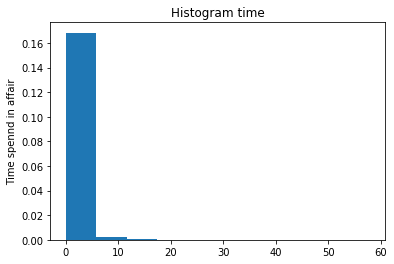

In [15]:
# plotting histogram in order to see time spend in affairs
plt.hist(df.affair_int, normed = True, histtype = 'bar')

#plt.legend()
plt.ylabel('Time spennd in affair')
plt.title('Histogram time')

plt.show()


In [16]:
# Definición de variables:
# Utilice las mismas variables independientes que en el caso del modelo Logit
Y = df['affair_int']
X = df[[ ]]
X = sm.add_constant(X)

In [17]:
# Poisson:
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit()
print(poisson_res.summary())

Optimization terminated successfully.
         Current function value: 1.569301
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:             affair_int   No. Observations:                 6366
Model:                        Poisson   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Sat, 23 May 2020   Pseudo R-squ.:                  0.1024
Time:                        20:31:03   Log-Likelihood:                -9990.2
converged:                       True   LL-Null:                       -11130.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.3544      0.131     25.596      0.000       3.098       3.611
occupation    

In [18]:
poisson_margeff = poisson_res.get_margeff()
print(poisson_margeff.summary())

       Poisson Marginal Effects      
Dep. Variable:             affair_int
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0765      0.013      5.712      0.000       0.050       0.103
educ               -0.0220      0.006     -3.532      0.000      -0.034      -0.010
occupation_husb     0.0051      0.009      0.570      0.568      -0.012       0.023
rate_marriage      -0.4082      0.012    -34.743      0.000      -0.431      -0.385
age                -0.0223      0.004     -5.500      0.000      -0.030      -0.014
yrs_married        -0.0084      0.004     -1.921      0.055      -0.017       0.000
children           -0.0145      0.014     -1.061      0.289      -0.041       0.012
religious          -0.2902      0.014    -20.179      0.000      -0.318      -0.262


### Realice una interpretación de sus resultados

....


## 5. Comparación de resultados

In [19]:
# Resultados:
results_table = summary_col(results=[affair_est, poisson_res],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model Logit',
                                         'Model Poisson'],
                            regressor_order=['const',
                                             'occupation', 
                                             'educ', 
                                             'occupation_husb', 
                                             'rate_marriage', 
                                             'age', 
                                             'yrs_married', 
                                             'children', 
                                             'religious'])

results_table.add_title('Table 1 - Comparative Logit and Poisson Regressions')

print(results_table)

Table 1 - Comparative Logit and Poisson Regressions
                Model Logit Model Poisson
-----------------------------------------
const                       3.35***      
                            (0.13)       
occupation      0.16***     0.09***      
                (0.03)      (0.02)       
educ            -0.04**     -0.03***     
                (0.02)      (0.01)       
occupation_husb 0.01        0.01         
                (0.02)      (0.01)       
rate_marriage   -0.72***    -0.48***     
                (0.03)      (0.01)       
age             -0.06***    -0.03***     
                (0.01)      (0.00)       
yrs_married     0.11***     -0.01*       
                (0.01)      (0.01)       
children        -0.00       -0.02        
                (0.03)      (0.02)       
religious       -0.38***    -0.34***     
                (0.03)      (0.02)       
Intercept       3.73***                  
                (0.30)                   
Standard errors in paren

### Haga un breve conclusión de sus resultados

...
